# Exploratory data analysis

## Imports

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sps
from datetime import timedelta, date, datetime

import warnings

warnings.filterwarnings("ignore")

## Data

In [2]:
# The dataframe is available on
# https://github.com/owid/covid-19-data
# https://www.kaggle.com/gpreda/covid-world-vaccination-progress
# The original dataframe contains 104214 observations of 16 parameters.
# For this project only 8 parameters were subsetted and used

In [3]:
# Download data from Github
data_table = pd.read_csv(
    "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
)

In [4]:
data_table = data_table[
    [
        "location",
        "date",
        "total_vaccinations",
        "people_vaccinated",
        "people_fully_vaccinated",
        "total_vaccinations_per_hundred",
        "people_vaccinated_per_hundred",
        "people_fully_vaccinated_per_hundred",
    ]
].rename(columns={"location": "country"})

In [5]:
data_table = data_table[data_table["date"] < "2022-01-01"]

In [6]:
data_table.head(1)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Afghanistan,2021-02-22,0.0,0.0,NaN,0.0,0.0,NaN


## Exploratory Data Analysis

The dataframe describes vaccination rates in 235 countries across the world.  
The vaccinations began in the end of 2020.  
Vaccination programs still exist at autumn of 2021. 

### Statistical data description

In [7]:
data_table.describe().round()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
count,3.886900e+04,3.715000e+04,3.364600e+04,38869.0,37150.0,33646.0
mean,1.359527e+08,7.211309e+07,5.421576e+07,62.0,34.0,28.0
std,6.225162e+08,3.354053e+08,2.628504e+08,57.0,28.0,26.0
min,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.0,0.0
25%,4.991770e+05,3.483650e+05,2.287650e+05,9.0,7.0,3.0
50%,3.785076e+06,2.359312e+06,1.769276e+06,48.0,31.0,21.0
75%,2.446624e+07,1.475334e+07,1.143524e+07,107.0,59.0,50.0
max,9.178232e+09,4.558248e+09,3.879379e+09,332.0,126.0,123.0


In [8]:
# the number of vaccinations could be larger than the population size since many vaccines require two shots.
# Moreover, many people traveled aboad to recieve a better or additional vaccine

In [9]:
# List of all countries and continents
countries = data_table.country.unique().tolist()
len(countries)

235

In [10]:
data_table.isnull().sum()

country                                    0
date                                       0
total_vaccinations                     34815
people_vaccinated                      36534
people_fully_vaccinated                40038
total_vaccinations_per_hundred         34815
people_vaccinated_per_hundred          36534
people_fully_vaccinated_per_hundred    40038
dtype: int64

### countries with sparse data

In [11]:
data_table["total"] = np.nan

In [18]:
# the main feature is people_fully_vaccinated_per_hundred
nan_stats = (
    data_table[["people_fully_vaccinated_per_hundred", "total"]]
    .isnull()
    .groupby([data_table["country"]])
    .sum()
    .astype(int)
    # .reset_index(name="count")
)
nan_stats["nan_ratio"] = round(
    nan_stats["people_fully_vaccinated_per_hundred"] / nan_stats["total"] * 100, 1
)

In [19]:
nan_stats[nan_stats.index == "Serbia"]

,people_fully_vaccinated_per_hundred,total,nan_ratio
country,,,
Serbia,180,358,50.3


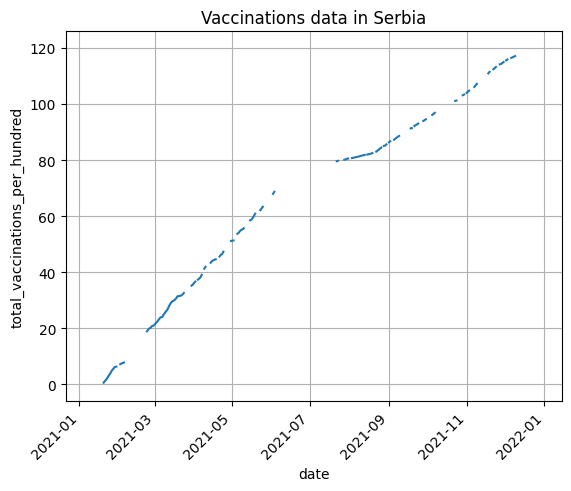

In [20]:
sample = data_table[data_table["country"] == "Serbia"]
plt.plot(pd.to_datetime(sample["date"]), sample["total_vaccinations_per_hundred"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("date")
plt.ylabel("total_vaccinations_per_hundred")
plt.title("Vaccinations data in Serbia")
plt.grid()

In [24]:
nan_stats[nan_stats.index == "Algeria"]

,people_fully_vaccinated_per_hundred,total,nan_ratio
country,,,
Algeria,321,337,95.3


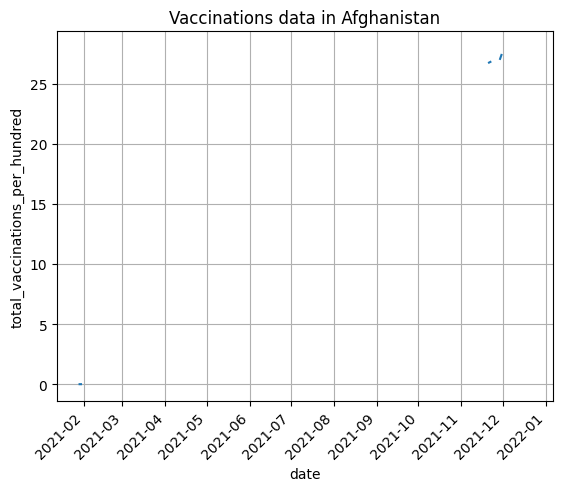

In [25]:
sample = data_table[data_table["country"] == "Algeria"]
plt.plot(pd.to_datetime(sample["date"]), sample["total_vaccinations_per_hundred"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("date")
plt.ylabel("total_vaccinations_per_hundred")
plt.title("Vaccinations data in Afghanistan")
plt.grid()

### Data visualisation

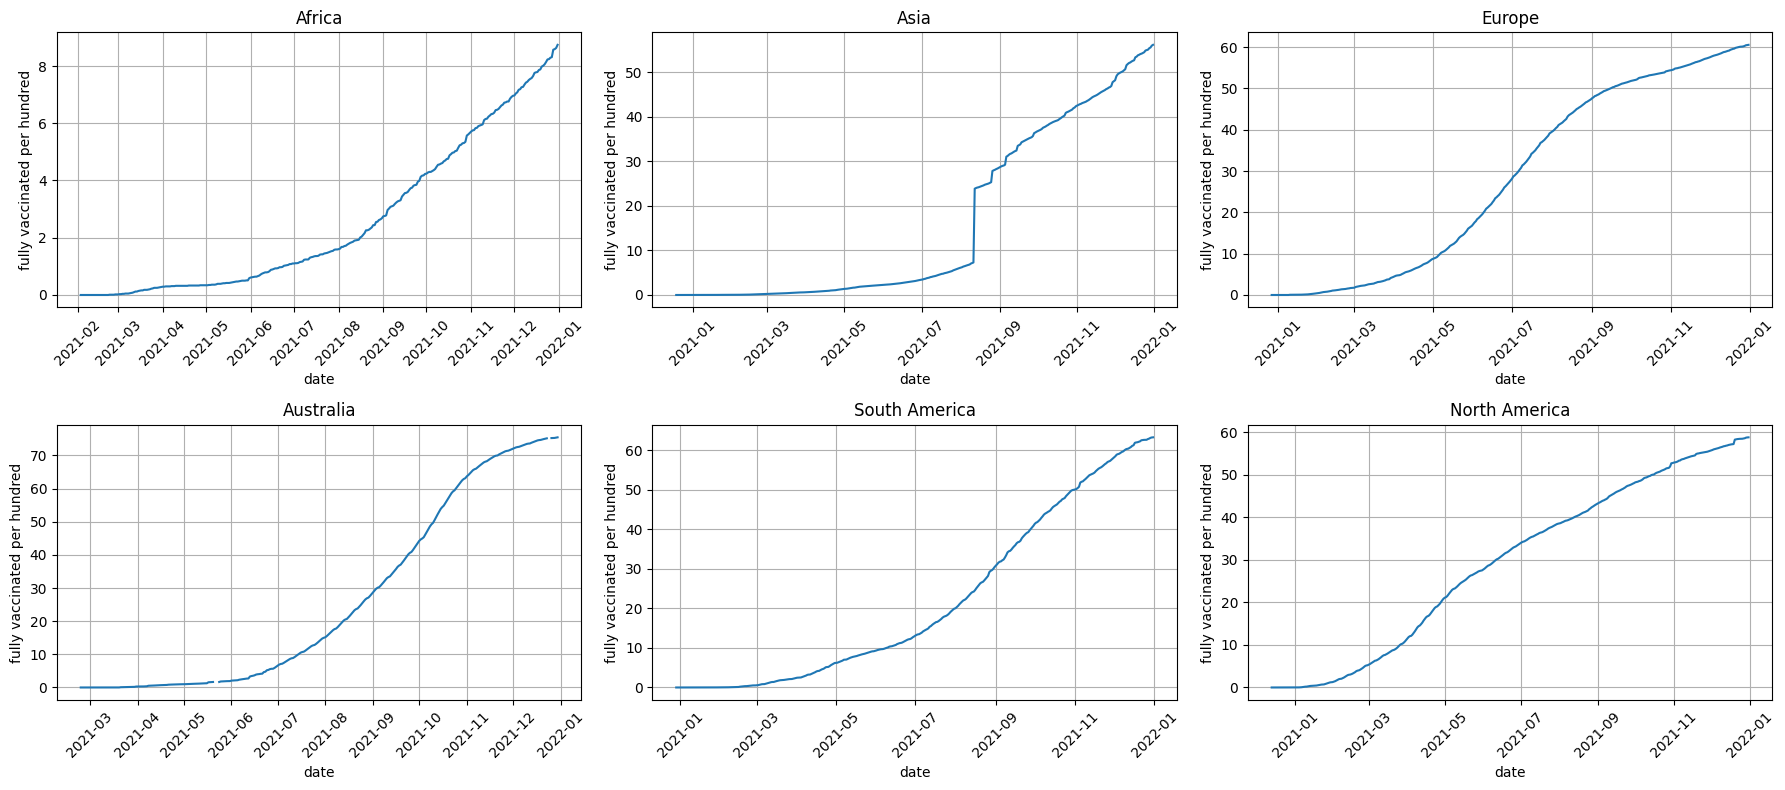

In [26]:
# full vaccinations per hundred across six continents

continents = ["Africa", "Asia", "Europe", "Australia", "South America", "North America"]
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

for i, continent in enumerate(continents):
    j = i % 3
    i = i // 3

    sample = data_table[data_table["country"] == continent]
    ax[i, j].plot(
        pd.to_datetime(sample["date"]),
        sample["people_fully_vaccinated_per_hundred"],
    )
    ax[i, j].grid()
    ax[i, j].set_title(continent)
    ax[i, j].set_xlabel("date")
    ax[i, j].tick_params(axis="x", labelrotation=45)
    ax[i, j].set_ylabel("fully vaccinated per hundred")

fig.tight_layout()
plt.show()

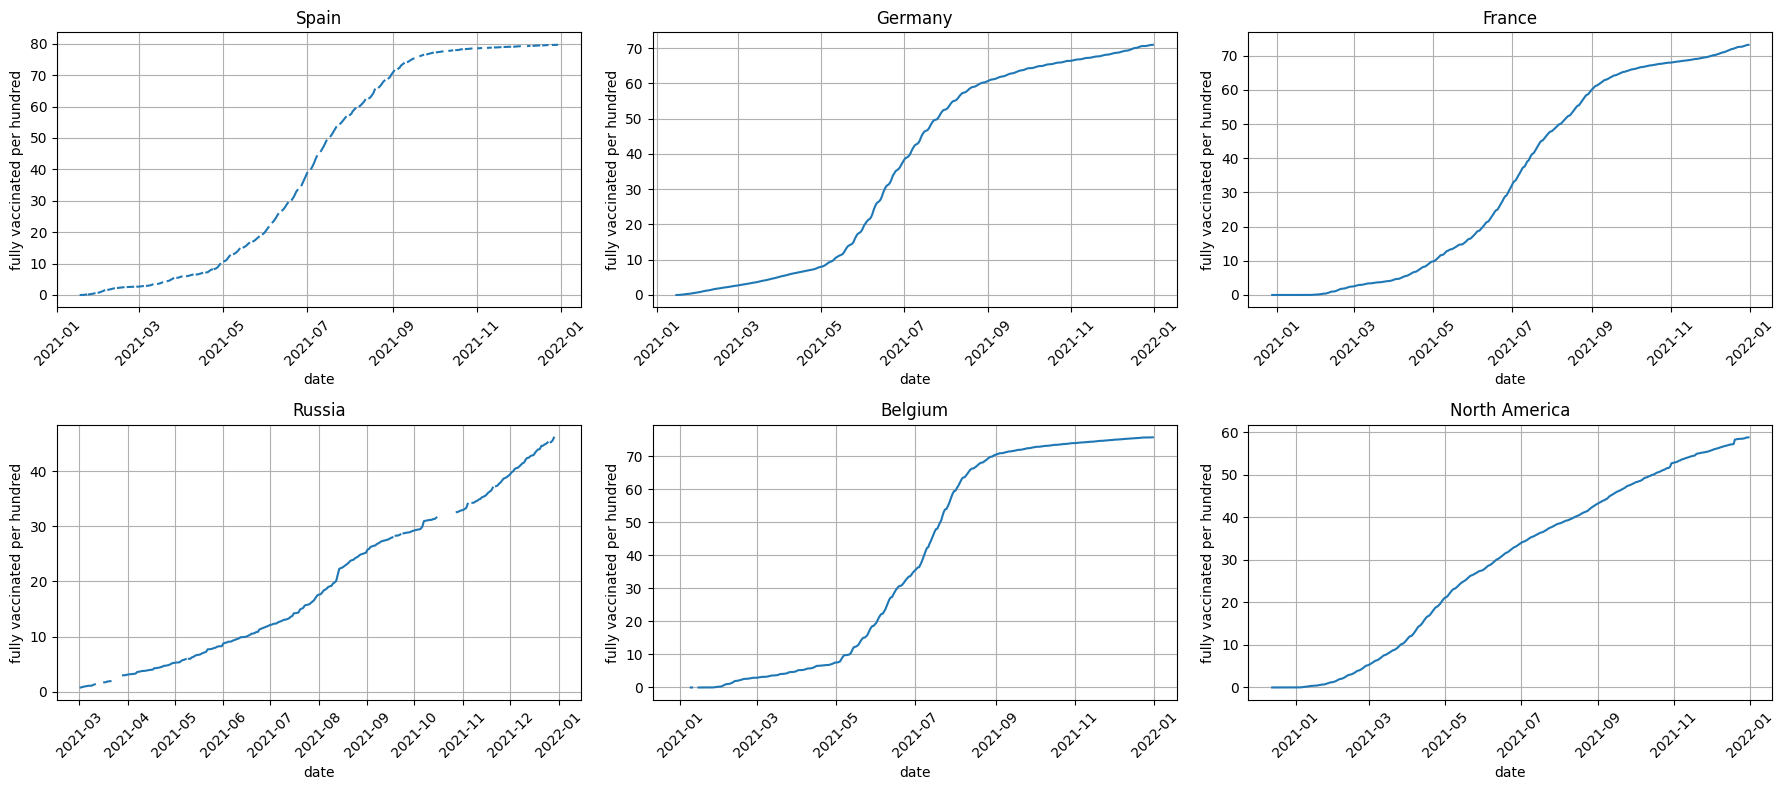

In [27]:
# full vaccinations per hundred across six sample_countries

sample_countries = [
    "Spain",
    "Germany",
    "France",
    "Russia",
    "Belgium",
    "North America",
]
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

for i, continent in enumerate(sample_countries):
    j = i % 3
    i = i // 3

    sample = data_table[data_table["country"] == continent]
    ax[i, j].plot(
        pd.to_datetime(sample["date"]),
        sample["people_fully_vaccinated_per_hundred"],
    )
    ax[i, j].grid()
    ax[i, j].set_title(continent)
    ax[i, j].set_xlabel("date")
    ax[i, j].tick_params(axis="x", labelrotation=45)
    ax[i, j].set_ylabel("fully vaccinated per hundred")

fig.tight_layout()
plt.show()

### Results

- Europe, Asia, and North America were the first countries to develop vaccines against COVID-19 and deploy a full-scale vaccination program.  
- Other continents, like Africa, South America, and Australia lagged behind in vaccination rates, since they did not have neither developed pharm industry nor enough resources, and they had to wait for vaccine supplies from developed countries. 
- It looks like the curves hit the saturation level when reaching 80% of vaccinated people. This dependency can be modeled with sigmoid curve
- It is evident that despite the fact that vaccinations began in the end of 2020 many countries started vaccinations programs much later.  
- At that time only developed asian, european and north american countries could financially and logisticaly afford to begin vaccinations. Less developed countries started to receive vaccines later in the spring of 2021.  
